## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

Attribute Information:

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2 sex - student's sex (binary: 'F' - female or 'M' - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)

## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [37]:
stu=pd.read_csv("students-data.csv", sep=';')
stu

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [170]:
#stu.iloc[:,0]
stu.index.name="number"
stu.info()

print(stu.groupby('age') ['age'].count())
print(stu.groupby('school')['school'].count())
print(stu.groupby('sex') ['sex'].count())
print(stu.groupby('address') ['address'].count())
print(stu.groupby('famsize') ['famsize'].count())

#pd.isna(stu).groupby(stu).count()
stu.dropna(axis=0, how='any')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
goout         395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int64
G2            395 non-null int64
G3            395 no

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,yes,no,2,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,yes,no,4,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,yes,no,no,4,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,yes,no,2,1,1,0,16,18,19


## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [39]:
stu.select_dtypes(exclude=['int64'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
5,GP,M,U,LE3,T,services,other,reputation,mother,no,yes,yes,yes,yes,yes,yes,no
6,GP,M,U,LE3,T,other,other,home,mother,no,no,no,no,yes,yes,yes,no
7,GP,F,U,GT3,A,other,teacher,home,mother,yes,yes,no,no,yes,yes,no,no
8,GP,M,U,LE3,A,services,other,home,mother,no,yes,yes,no,yes,yes,yes,no


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
xfilter = VarianceThreshold(1)
stu1=stu.select_dtypes(['int64'])
print(stu1.var() )
xfilter.fit(stu1)
#xfilter.fit(stu)
#stu1=xfilter.get_support(indices=True)
stu2 = stu1.loc[:, xfilter.get_support()]
print(stu2.head())
print("Columns with variance greater than 1 are \n",+stu2.var())

print("Dropping colums with low variance")
stu.drop(['traveltime','studytime','failures','famrel','freetime','Dalc'], axis =1, inplace=True)
print(stu)

#Alternatively, this should also work
#stu.loc[:, stu.var() > 1]


age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64
        age  Medu  Fedu  goout  Walc  health  absences  G1  G2  G3
number                                                            
0        18     4     4      4     1       3         6   5   6   6
1        17     1     1      3     1       3         4   5   5   6
2        15     1     1      2     3       3        10   7   8  10
3        15     4     2      2     1       5         2  15  14  15
4        16     3     3      2     2       5         4   6  10  10
Columns with variance greater than 1 are 
 age          1.628285
Medu         1.198445
Fedu         1.184180
goout        1.239388
W

In [44]:
stu.var()

age          1.628285
Medu         1.198445
Fedu         1.184180
goout        1.239388
Walc         1.658678
health       1.932944
absences    64.049541
G1          11.017053
G2          14.148917
G3          20.989616
dtype: float64

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [74]:
print(stu.select_dtypes(exclude=['int64']).head(10))
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

stu1 = stu.select_dtypes(exclude=['int64'])

stu2= stu1.apply(le.fit_transform)

print(stu2.head(10))


stu1=stu.copy()
stu1=stu1.drop(stu2.columns, axis=1)
stu_final=pd.concat([stu1,stu2], axis=1)
stu_final.head(10)


       school sex address famsize Pstatus      Mjob      Fjob      reason  \
number                                                                      
0          GP   F       U     GT3       A   at_home   teacher      course   
1          GP   F       U     GT3       T   at_home     other      course   
2          GP   F       U     LE3       T   at_home     other       other   
3          GP   F       U     GT3       T    health  services        home   
4          GP   F       U     GT3       T     other     other        home   
5          GP   M       U     LE3       T  services     other  reputation   
6          GP   M       U     LE3       T     other     other        home   
7          GP   F       U     GT3       A     other   teacher        home   
8          GP   M       U     LE3       A  services     other        home   
9          GP   M       U     GT3       T     other     other        home   

       guardian schoolsup famsup paid activities nursery higher internet  \

,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3,...,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,,,,,
0,18,4,4,4,1,3,6,5,6,6,...,0,1,1,0,0,0,1,1,0,0
1,17,1,1,3,1,3,4,5,5,6,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,2,3,3,10,7,8,10,...,2,1,1,0,1,0,1,1,1,0
3,15,4,2,2,1,5,2,15,14,15,...,1,1,0,1,1,1,1,1,1,1
4,16,3,3,2,2,5,4,6,10,10,...,1,0,0,1,1,0,1,1,0,0
5,16,4,3,2,2,5,10,15,15,15,...,3,1,0,1,1,1,1,1,1,0
6,16,2,2,4,1,3,0,12,12,11,...,1,1,0,0,0,0,1,1,1,0
7,17,4,4,4,1,1,6,6,5,6,...,1,1,1,1,0,0,1,1,0,0
8,15,3,2,2,1,1,0,16,18,19,...,1,1,0,1,1,0,1,1,1,0


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [76]:
print(stu_final[['G1','G2','G3']].head(10))
stu_final.loc[stu_final['G1'] < 11, 'G1'] = 0
stu_final.loc[stu_final['G1'] > 10, 'G1'] = 1
stu_final.loc[stu_final['G2'] < 11, 'G2'] = 0
stu_final.loc[stu_final['G2'] > 10, 'G2'] = 1
stu_final.loc[stu_final['G3'] < 11, 'G3'] = 0
stu_final.loc[stu_final['G3'] > 10, 'G3'] = 1
stu_final[['G1','G2','G3']].head(10)

        G1  G2  G3
number            
0        5   6   6
1        5   5   6
2        7   8  10
3       15  14  15
4        6  10  10
5       15  15  15
6       12  12  11
7        6   5   6
8       16  18  19
9       14  15  15


,G1,G2,G3
number,,,
0,0,0,0
1,0,0,0
2,0,0,0
3,1,1,1
4,0,0,0
5,1,1,1
6,1,1,1
7,0,0,0
8,1,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [79]:
X=stu_final.drop(['G3'], inplace=False, axis=1)
y=stu_final[['G3']]
print(y.head(10))
X.head(10)


        G3
number    
0        0
1        0
2        0
3        1
4        0
5        1
6        1
7        0
8        1
9        1


,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,school,...,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,,,,,
0,18,4,4,4,1,3,6,0,0,0,...,0,1,1,0,0,0,1,1,0,0
1,17,1,1,3,1,3,4,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,2,3,3,10,0,0,0,...,2,1,1,0,1,0,1,1,1,0
3,15,4,2,2,1,5,2,1,1,0,...,1,1,0,1,1,1,1,1,1,1
4,16,3,3,2,2,5,4,0,0,0,...,1,0,0,1,1,0,1,1,0,0
5,16,4,3,2,2,5,10,1,1,0,...,3,1,0,1,1,1,1,1,1,0
6,16,2,2,4,1,3,0,1,1,0,...,1,1,0,0,0,0,1,1,1,0
7,17,4,4,4,1,1,6,0,0,0,...,1,1,1,1,0,0,1,1,0,0
8,15,3,2,2,1,1,0,1,1,0,...,1,1,0,1,1,0,1,1,1,0


## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

In [91]:
#checking the relationship two table way

rel_G2_G3 = pd.crosstab(index=stu["G2"], 
                          columns=stu["G3"])



G3,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
G2,,,,,,,,,,,,,,,,,,
0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,0,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,3,1,1,6,2,1,0,0,0,0,0,0,0,0,0,0,0,0
7,4,0,1,4,3,7,2,0,0,0,0,0,0,0,0,0,0,0
8,4,0,0,1,3,13,5,4,2,0,0,0,0,0,0,0,0,0
9,5,0,0,0,1,11,15,17,1,0,0,0,0,0,0,0,0,0
10,2,0,0,0,0,0,5,26,11,2,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,1,8,19,6,1,0,0,0,0,0,0,0


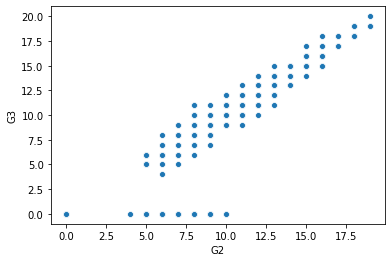

In [93]:
sns.scatterplot(x="G2", y="G3", data=stu)


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

school
GP    349
MS     46
Name: school, dtype: int64


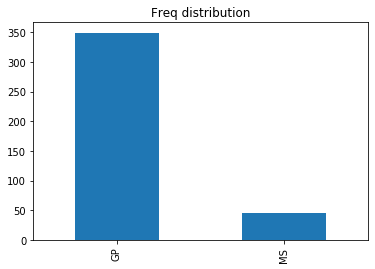

In [98]:
print(stu.groupby('school')['school'].count())
stu['school'].value_counts().plot.bar(title='Freq distribution')

age
15     82
16    104
17     98
18     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64


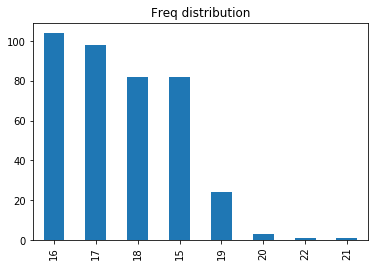

In [99]:
print(stu.groupby('age')['age'].count())
stu['age'].value_counts().plot.bar(title='Freq distribution')

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [126]:
test_size=(395-300)/395
test_size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=7)
print("\nTrain record count is \n",+X_train.count(),"\n\nTest record count is \n",+X_test.count())


Train record count is 
 age           300
Medu          300
Fedu          300
goout         300
Walc          300
health        300
absences      300
G1            300
G2            300
school        300
sex           300
address       300
famsize       300
Pstatus       300
Mjob          300
Fjob          300
reason        300
guardian      300
schoolsup     300
famsup        300
paid          300
activities    300
nursery       300
higher        300
internet      300
romantic      300
dtype: int64 

Test record count is 
 age           95
Medu          95
Fedu          95
goout         95
Walc          95
health        95
absences      95
G1            95
G2            95
school        95
sex           95
address       95
famsize       95
Pstatus       95
Mjob          95
Fjob          95
reason        95
guardian      95
schoolsup     95
famsup        95
paid          95
activities    95
nursery       95
higher        95
internet      95
romantic      95
dtype: int64


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print("Accuracy : ",+model_score)
print("F1_score: ",+metrics.f1_score(y_test, y_predict, average='micro'))
print(metrics.confusion_matrix(y_test, y_predict))

Accuracy :  0.8333333333333334
F1_score:  0.8333333333333334
[[11  0  0]
 [ 0  8  5]
 [ 0  0  6]]


d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Naive bayes with Iris data

### Import Iris.csv

In [129]:
iris=pd.read_csv("Iris_1.csv")
iris

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [131]:
X=iris.drop('Class',axis=1,inplace=False)
y=iris[['Class']]
print(X.head(10))
y.head(10)

   Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
0                   5.1                  3.5                   1.4   
1                   4.9                  3.0                   1.4   
2                   4.7                  3.2                   1.3   
3                   4.6                  3.1                   1.5   
4                   5.0                  3.6                   1.4   
5                   5.4                  3.9                   1.7   
6                   4.6                  3.4                   1.4   
7                   5.0                  3.4                   1.5   
8                   4.4                  2.9                   1.4   
9                   4.9                  3.1                   1.5   

   Petal width (in cm)  
0                  0.2  
1                  0.2  
2                  0.2  
3                  0.2  
4                  0.2  
5                  0.4  
6                  0.3  
7                  0.2  
8   

,Class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
5,Iris-setosa
6,Iris-setosa
7,Iris-setosa
8,Iris-setosa
9,Iris-setosa


### Find the distribution of target variable (Class)

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64


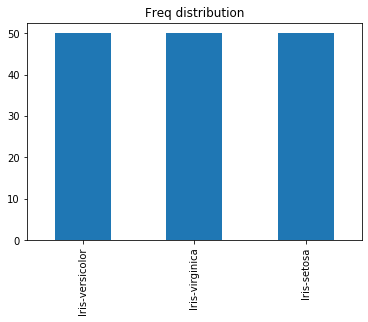

In [133]:
print(y.groupby('Class')['Class'].count())
y['Class'].value_counts().plot.bar(title='Freq distribution')

### Plot the distribution of target variable using histogram

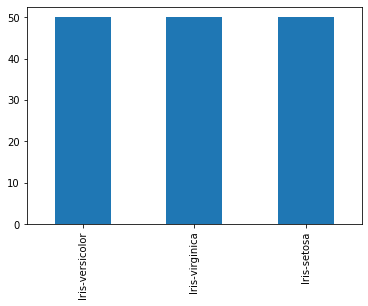

In [134]:
pd.value_counts(iris["Class"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

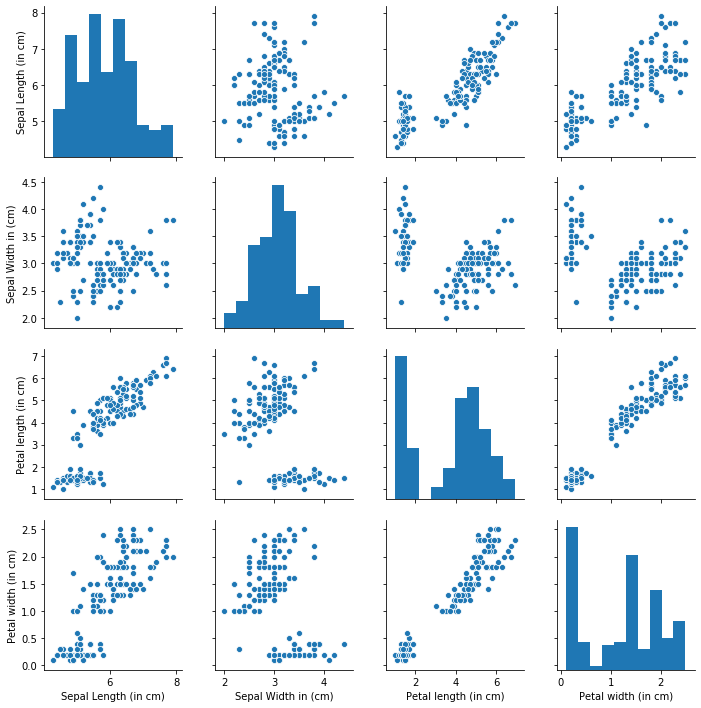

In [136]:
sns.pairplot(iris)

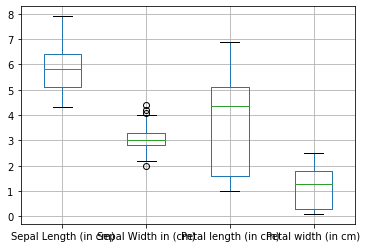

In [144]:
import matplotlib.pyplot as plt
iris.boxplot()

Observations from above pairplot
Petal width and petal lengh has good correlation and the plot is pretty linear 
Petal length and sepal width has extremely poor correlation and are almost independent of each other 
Sepal width and sepal length has no corelation at all and the plot is pretty scattered everywhere
Petal length and Sepal length shows good corelation in plot


Apart from above talking about variables, 
Petal length has high variance
Sepal width has lowest variance. But it has few prominent outliers

### Summary Statistics and explain insights for at least 2 variables

Petal width and petal lengh has good correlation and the plot is pretty linear 
Petal length and sepal width has extremely poor correlation and are almost independent of each other 
Sepal width and sepal length has no corelation at all and the plot is pretty scattered everywhere



Apart from above talking about variables, 
Petal length has high variance
Sepal width has lowest variance. But it has few prominent outliers

### Correlation among all variables and give your insights

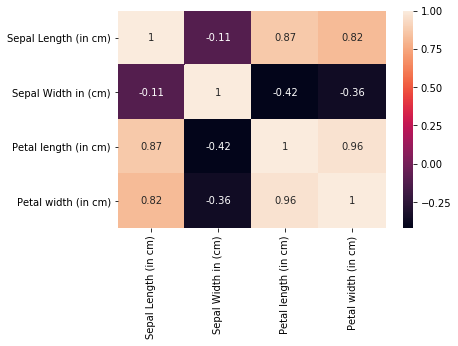

In [145]:
sns.heatmap(X.corr(), annot=True )


Petal width and petal lengh has high correlation and the plot is pretty linear 
Petal length and sepal width has extremely poor correlation and are almost independent of each other 
Sepal width and sepal length has poor corelation and the plot is pretty scattered everywhere
Petal width and sepal length has good corelation 
petal length and sepal length has good corelation

### Split data in Training and Validation in 80:20

In [172]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

# convert y (target class ) into numerical using label encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y1= y.apply(le.fit_transform)
test_size = 0.20 
seed = 1 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y1, test_size=test_size, random_state=seed)

### Do Feature Scaling

In [173]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

### Train and Fit NaiveBayes Model

In [184]:
model = GaussianNB()
model.fit(X_train, y_train)
#model.fit(scaledX_train, y_train)

d:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [185]:
expected = y_test
predicted = model.predict(X_test)

In [186]:
print(metrics.classification_report(expected, predicted))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



### Print Accuracy and Confusion Matrix and Conclude your findings

In [187]:
print("Accuracy:", metrics.accuracy_score(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

Accuracy: 0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


Our model's accuracy is pretty good at almost 97%. That means we are able to categorize class of flowers using other attributes almost 97% of times.